### 1. Vẽ phương trình y = ax + b (cho phép gán giá trị khác nhau của a,b)

Ý tưởng:
+ Input vào hàm hệ số a,b tương ứng y=ax+b
+ Hàm random tạo ra các giá trị x ngẫu nhiên và tạo ra list x
+ Từ list x tạo ra list y tương ứng theo hệ số a,b

In [1]:
import random
x=[]
x.append(random.randint(-7,10))
x

[-3]

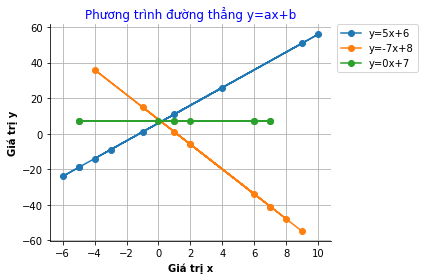

In [2]:
import random
from matplotlib import pyplot as plt
from matplotlib.spines import Spine
def plot_straight_line(a=0,b=0):
    x=[]
    y=[]
    for i in range(0,10):
        x.append(random.randint(-7,10))
    for i in range(0,len(x)):
        y.append(a*x[i]+b)

    plt.plot(x,y,marker="o",label=f'y={a}x+{b}')
    plt.title("Phương trình đường thẳng y=ax+b",color='b', size=12)
    plt.grid()
    plt.xlabel("Giá trị x", weight='bold')
    plt.ylabel("Giá trị y", weight='bold')
    plt.legend(loc=[1.02,0.78])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.tight_layout()
    plt.savefig("straigt_line.png",dpi=100)
    
plot_straight_line(5,6)
plot_straight_line(-7,8)
plot_straight_line(0,7)
plt.show()

### 2. Đọc và Vẽ biểu đồ dữ liệu chứng khoán 

Ý tưởng:
+ Lấy các giá cổ phiếu cần theo cột trong file
+ Lấy dữ liệu về ngày và chuyển nó thành dạng date time
+ Tiến hành vẽ bằng matplotlib

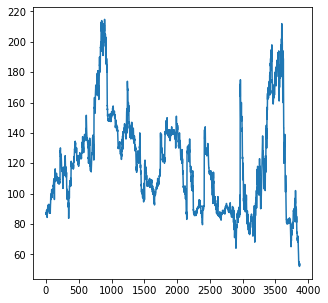

In [3]:
import csv
from matplotlib import pyplot as plt
import matplotlib

close_fpt=[]
date_fpt=[]
check=0
with open ('data-stock\excel_vnm.csv',"r",encoding="utf8") as input_file:
    reader=csv.reader(input_file, delimiter=',')
    next(reader) #skip the header
    for row in reader:
        close_fpt.append(float(row[10]))
#         open_fpt.append(float(row[7]))
#         high_fpt.append(float(row[8]))
#         low_fpt.append(float(row[10]))
#         date_fpt.append(row[1])
    
fig = plt.figure(figsize=(5,5))
plt.plot(close_fpt)

plt.show()

In [4]:
import csv
from matplotlib import pyplot as plt
import matplotlib

close_fpt=[]
open_fpt=[]
high_fpt=[]
low_fpt=[]
date_fpt=[]
check=0
with open ('data-stock\excel_fpt.csv',"r",encoding="utf8") as input_file:
    reader=csv.reader(input_file, delimiter=',')
    next(reader) #skip the header
    for row in reader:
        close_fpt.append(float(row[10]))
        open_fpt.append(float(row[7]))
        high_fpt.append(float(row[8]))
        low_fpt.append(float(row[10]))
        date_fpt.append(row[1])
    

# datetime.strptime: string to datetime object
from datetime import datetime
date_fpt = [datetime.strptime(row, '%Y%m%d').date() for row in date_fpt]
date_fpt[0:10]

[datetime.date(2021, 8, 6),
 datetime.date(2021, 8, 5),
 datetime.date(2021, 8, 4),
 datetime.date(2021, 8, 3),
 datetime.date(2021, 8, 2),
 datetime.date(2021, 7, 30),
 datetime.date(2021, 7, 29),
 datetime.date(2021, 7, 28),
 datetime.date(2021, 7, 27),
 datetime.date(2021, 7, 26)]

In [5]:
# Vẽ theo loại giá truyền vô hàm
def draw_stock(date, price, type_price, c='tomato'):
    fig, axes = plt.subplots(figsize=(8, 5), sharex=True, sharey=True)
    axes.plot(date, price, color=c)
    axes.set_title(f'Giá {type_price} trong ngày', fontstyle='normal', weight='bold', color='navy')
    plt.xticks(color='navy')
    plt.yticks(color='navy')
    plt.xlabel('Năm', color='navy', fontsize=14, weight='bold')
    plt.ylabel('Giá trị (1000 VND)', color='navy', fontsize=14, weight='bold')
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.spines['left'].set_color('navy')
    axes.spines['bottom'].set_color('navy')
    axes.tick_params(axis='both', colors='navy')
    plt.grid()

In [6]:
# Vẽ theo 4 loại giá đóng-mở-cao-thấp nhất trong ngày
def draw_stock_company(date, open_price, close_price, low_price, high_price, name_company='FPT'):
    print(f'Giá chứng khoán của {name_company}')
    draw_stock(date, open_price, 'mở cửa', 'b')
    draw_stock(date, close_price, 'đóng cửa')
    draw_stock(date, low_price, 'thấp nhất')
    draw_stock(date, high_price, 'cao nhất')

Giá chứng khoán của FPT


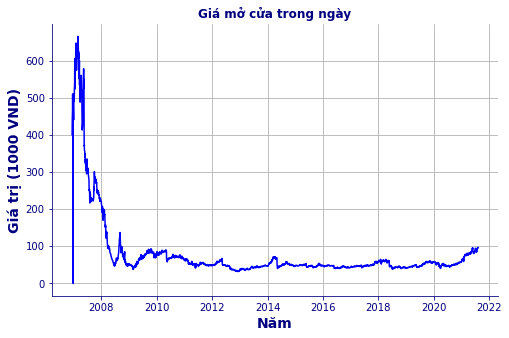

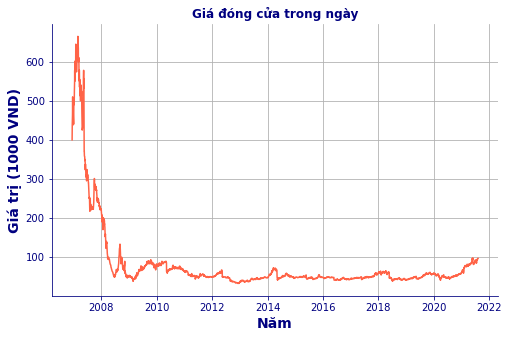

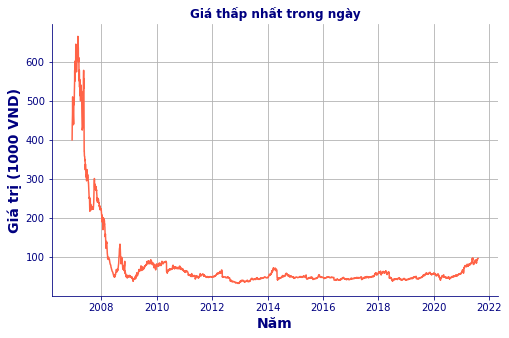

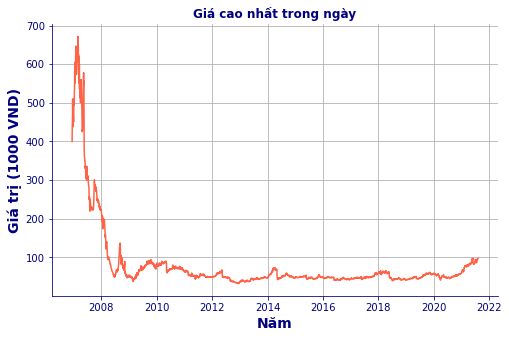

In [7]:
draw_stock_company(date_fpt, open_fpt, close_fpt, low_fpt, high_fpt, name_company='FPT')

### Bài 3a: Vẽ biểu đồ chứng khoán với nhiều mã khác nhau

In [8]:
def close_price(file_path):
    close_price=[]
    date_ck=[]
    with open (file_path,"r",encoding="utf8") as input_file:
        reader=csv.reader(input_file)
        next(reader) #skip the header
        for row in reader:
            close_price.append(float(row[10]))
            date_ck.append(row[1])

    from datetime import datetime
    date_ck = [datetime.strptime(row, '%Y%m%d').date() for row in date_ck]
    return close_price, date_ck
    

In [9]:
close_acb, date_acb = close_price('data-stock/excel_acb.csv')
close_dxg, date_dxg = close_price('data-stock/excel_dxg.csv')
close_flc, date_flc = close_price('data-stock/excel_flc.csv')
close_vnm, date_vnm = close_price('data-stock/excel_vnm.csv')

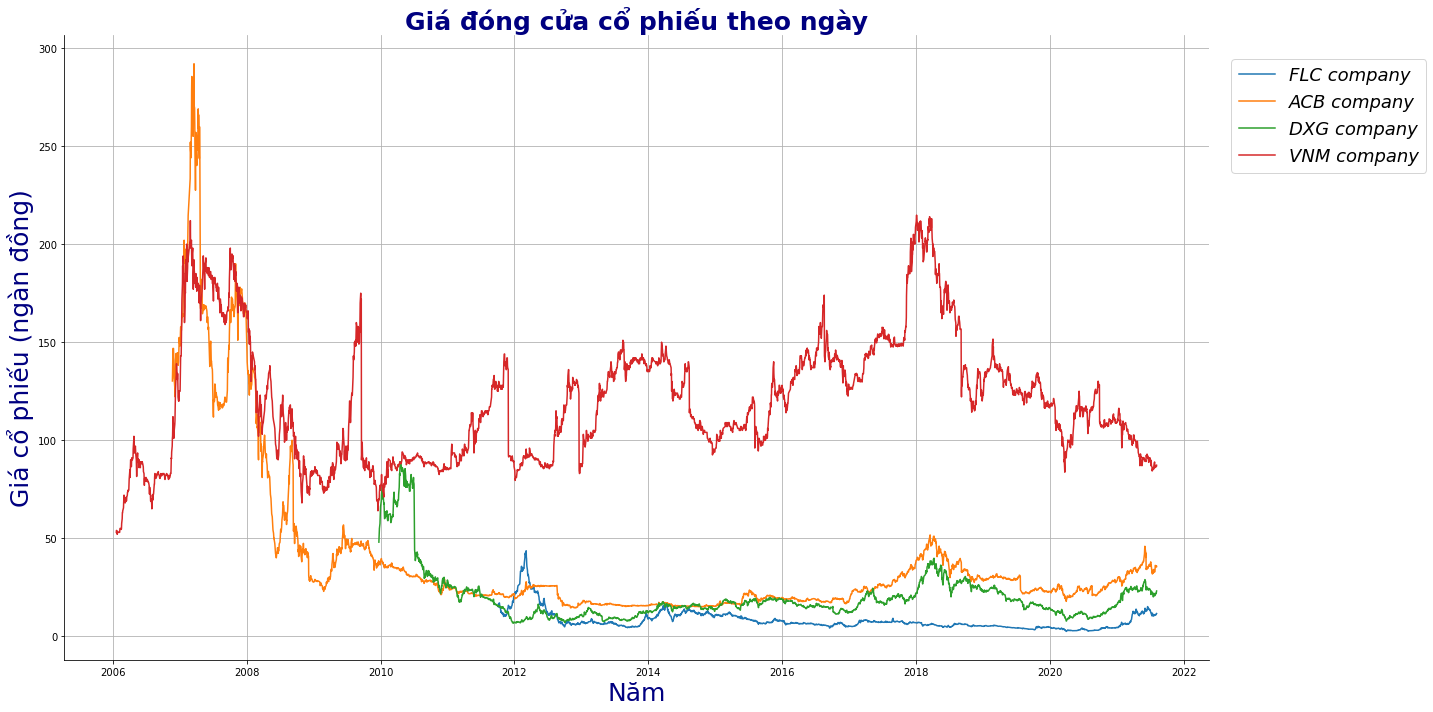

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(date_flc, close_flc,label='FLC company')
plt.plot(date_acb, close_acb,label='ACB company')
plt.plot(date_dxg, close_dxg,label='DXG company')
plt.plot(date_vnm, close_vnm,label='VNM company')
plt.grid()
plt.legend(loc=[1.02,0.78], prop={'style':'oblique', 'size': 18}) 
plt.title('Giá đóng cửa cổ phiếu theo ngày', size =25, weight='bold', color='navy')
plt.xlabel("Năm", size=25, color='navy')
plt.ylabel("Giá cổ phiếu (ngàn đồng)", size=25, color='navy')
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("manycompany_closedprice.png",dpi=100)
plt.show()

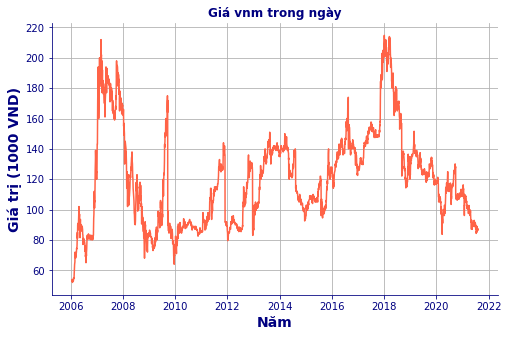

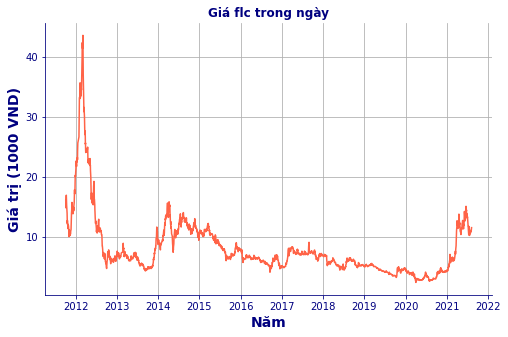

In [11]:
draw_stock(date_vnm, close_vnm, 'vnm')
draw_stock(date_flc, close_flc, 'flc')

### Bài 3b: Vẽ phương trình y=ax^2+bx+c 

Ý tưởng hàm:
+ input a,b,c tương ứng y=ax^2+bx+c
+ random tạo ra một list x
+ list x tính toán với hệ số a,b,c để tạo ra list y tương ứng

[279, 210, 151, 102, 63, 34, 15, 6, 7, 18, 39, 70, 111, 162, 223, 294, 375]
[-266, -212, -164, -122, -86, -56, -32, -14, -2, 4, 4, -2, -14, -32, -56, -86, -122]
[-42, -37, -32, -27, -22, -17, -12, -7, -2, 3, 8, 13, 18, 23, 28, 33, 38]


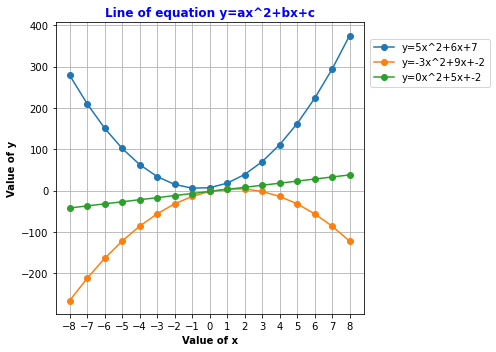

In [12]:
import random
from matplotlib import pyplot as plt
def plot_xsquare_line(a=0,b=0,c=0):
    x=[]
    y=[]
    k=0
    for i in range(-8,9):
        x.append(i)

    for i in range(0,len(x)):
        y.append(a*(x[k]**2)+b*x[k]+c)
        k=k+1
        
    plt.plot(x,y,marker="o",label=f'y={a}x^2+{b}x+{c}')
    plt.title(f"Line of equation y=ax^2+bx+c",color='b',weight='bold')
    plt.grid()
    plt.xlabel("Value of x", weight='bold')
    plt.ylabel("Value of y", weight='bold')
    plt.legend(loc=[1.02,0.78])
    plt.xticks(x)
    plt.tight_layout()
    plt.savefig("xsquare_line.png",dpi=100)
    print(y)
plt.figure(figsize=(7, 5))
plot_xsquare_line(5,6,7)
plot_xsquare_line(-3,9,-2)
plot_xsquare_line(0,5,-2)

plt.show()